# 01. Neural Network Regression with TensorFlow

In [1]:
import tensorflow as tf

2022-04-25 11:53:26.824079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 11:53:26.824108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:

print(tf.__version__)

2.8.0


## Creating data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

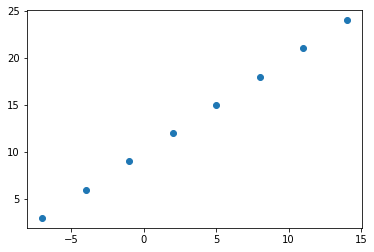

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes

In [6]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2022-04-25 11:53:44.656159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

2022-04-25 11:53:44.656204: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 11:53:44.656225: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-04-25 11:53:44.874837: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## steps in modelling with Tensorflow 

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Chack out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using our model

y_pred = model.predict([17.0])
y_pred


array([[12.716021]], dtype=float32)

## Improving our model

- **Creating a model:**  Sequential()
- **Compiling a model:**   loss, optimizer, metrix
- **Fitting a model:**   epochs

In [14]:
# Let's rebuild our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compie the model
model.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])


# 3. Fit the model  (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 274ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Let's see if our model's prediction has improves.
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
# Again improve our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compie the model
model.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['mae'])


# 3. Fit the model  (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.

In [18]:
model.predict([17.0])


array([[26.583529]], dtype=float32)

## Evaluating a model

In [19]:
# Make a bigger dataset

X= tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make a labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

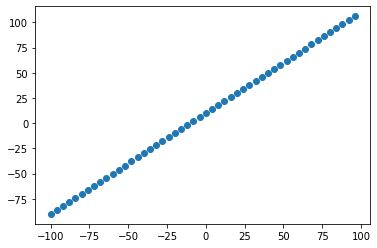

In [21]:
# visualize the data
import matplotlib.pylab as plt
plt.scatter(X, y)

### The 3 sets....

In [22]:
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data


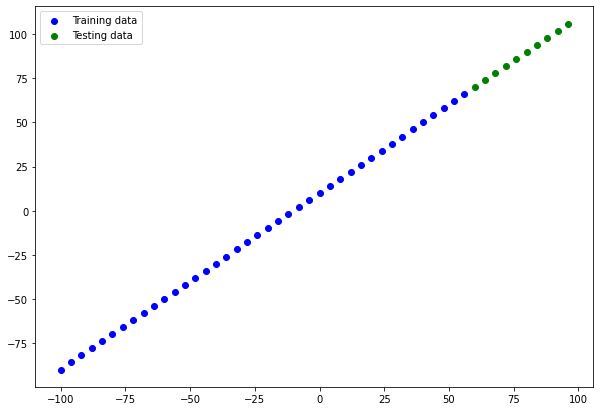

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()
plt.show()

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)                

### Visualizing the model

In [26]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [27]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
                tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
                tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [29]:
#fir out model to the training data

model.fit(tf.expand_dims(X_train, axis=-1), y_train,epochs=100 , verbose=0)                

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.utils import plot_model

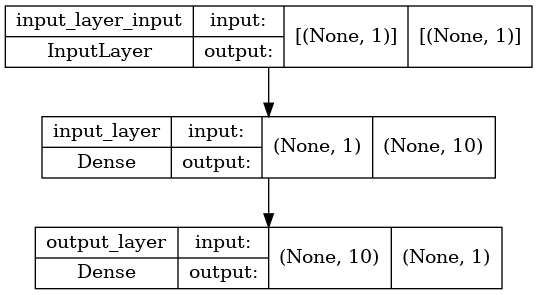

In [32]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [33]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
# Let's  creating a ploting functions
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test, 
                    test_labels=y_test,
                    predictions=y_pred):
                    

    plt.figure(figsize=(10,5))  
    # ploting training data in blue   
    plt.scatter(train_data, train_labels, c='b', label="Training data")

    # ploting testing data in green 
    plt.scatter(test_data, test_labels, c='g', label="Testing data")

    # ploting model's prediction data in red 
    plt.scatter(test_data, predictions, c='r', label="Predictions")

    plt.legend()
    

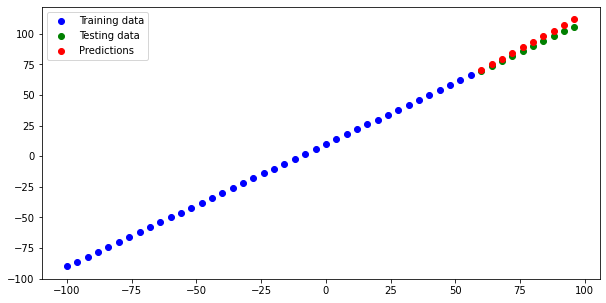

In [36]:
plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test, 
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating our model's predictions with regression evaluation matrics

In [37]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [38]:
#Calcuate the mean absolute error

mae = tf.keras.losses.MAE(y_test, y_pred)
# or 
# mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [39]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [42]:
#Calcuate the mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [43]:
#Calcuate the mean absolute error
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [44]:
# Make some functions to reuse to MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true = y_true, y_pred = y_pred)
def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true = y_true, y_pred = y_pred)

In [45]:
mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [46]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

### Running experiments to improve our model

**Build `model_1`**

In [47]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
                                ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics= ['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - l

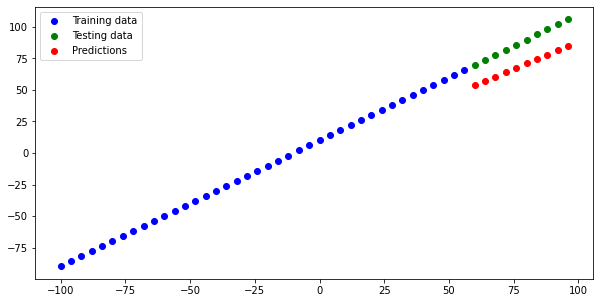

In [48]:
# Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [49]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18.745327>)

**Build `model_2`**


*2 dense layers, trained for 100 epochs*

In [50]:
#create the model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics= ['mae'])

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 17ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 

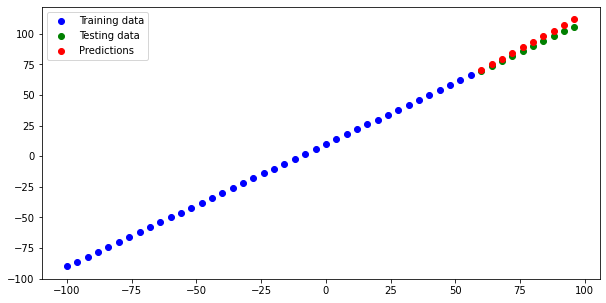

In [51]:
#make and plot prediction for mode_2
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [52]:
## Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**


*2 dense layers, trained for 500 epochs*

In [53]:
# set the seed
tf.random.set_seed(42)

# creat a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

#compile the model
model_3.compile(
    optimizer=tf.keras.optimizers.SGD(), 
                loss=tf.keras.losses.mae, 
                metrics=['mae'])

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500) 

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 3ms/

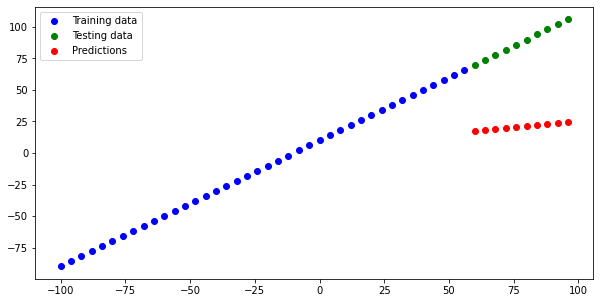

In [54]:
# make and plot predictions for model_3
y_pred_3 = model_3.predict(y_test)

plot_predictions(predictions=y_pred_3)

In [55]:
## Calculate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.807144>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4549.661>)

## Comparing the results of our experiments

In [56]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=["model1", "model2", "model3"])              
all_results                    

,model1,model2,model3
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,66.807144,4549.661133


In [57]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Saving our model

In [58]:
# save model using the savedModel format
model.save('best_model_savedModel_format')


2022-04-25 11:54:53.012976: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [59]:
# save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## Loading a save model

In [60]:
#Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_savedModel_format')
loaded_SavedModel_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
#Load in the .h5 format model
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model from a google colab

In [ ]:
# from google.colab import files
# files.download('YOUR_MODEL_PATH')

## A larger example

In [4]:
# import required libraries
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read in the insurance dataset
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# let's try one-hot encodingour DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
# Create X &  y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [58]:
# X.shape
# y.shape

(1338,)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=42)


## Build Nural Network
[meaning of optimizer epoche and more ](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/
)

In [97]:
#set random seed
tf.random.set_seed(42)

#creat a model
insurance_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                ])

#Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ['mae'])
                      

# fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)                        

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0283 - mae: 10967.0283
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

In [98]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8921.2812 - mae: 8921.2812


[8921.28125, 8921.28125]

In [76]:
# insurance_pred = insurance_model.predict(y_test)
# insurance_pred

In [103]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [104]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [105]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mae'])

# Fit the model 
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [107]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

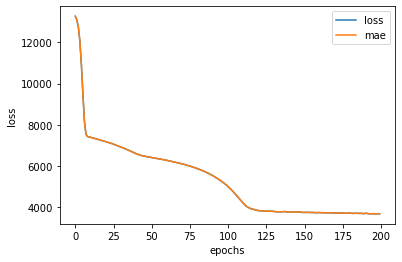

In [108]:
# Plot history(also nkow as loos curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## Preprocessing data (normalization and standardization)

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [125]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [126]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [130]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [131]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [140]:
# Build a NN-model

tf.random.set_seed(42)

# create a model
insurance_model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

#fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [141]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

## **Exercises**

## 1

In [1]:
# ! pip install tensorflow_datasets

In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X, y = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)
X.shape, y.shape                               

((200, 10), (200,))

In [7]:
#Build a model
#set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
                tf.keras.layers.Dense(1),
])

#Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# Fit the model
model.fit(X,y, epochs=100)


Epoch 1/100
7/7 [==============================] - 2s 1ms/step - loss: 169.8986 - mae: 169.8986
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 169.8497 - mae: 169.8497
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 169.8030 - mae: 169.8030
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 169.7560 - mae: 169.7560
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 169.7093 - mae: 169.7093
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 169.6637 - mae: 169.6637
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 169.6183 - mae: 169.6183
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 169.5726 - mae: 169.5726
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 169.5254 - mae: 169.5254
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 169.4782 - mae: 169.4782
Epoch 11/100
7/7 [=====================

## 2

In [8]:
#Build a model
#set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1),
])

#Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# Fit the model
model.fit(X,y, epochs=100)


Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 169.7385 - mae: 169.7385
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 169.6613 - mae: 169.6613
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 169.5898 - mae: 169.5898
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 169.5139 - mae: 169.5139
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 169.4188 - mae: 169.4188
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 169.3221 - mae: 169.3221
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 169.1826 - mae: 169.1826
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 169.0205 - mae: 169.0205
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 168.7747 - mae: 168.7747
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 168.3964 - mae: 168.3964
Epoch 11/100
7/7 [=====================

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 10), (40, 10), (160,), (40,))

In [13]:
#Build a model
#set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
                tf.keras.layers.Dense(1),
])

#Compile the model
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# Fit the model
model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 160.7476 - mae: 160.7476
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 160.7165 - mae: 160.7165
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 160.6866 - mae: 160.6866
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 160.6554 - mae: 160.6554
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 160.6252 - mae: 160.6252
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 160.5948 - mae: 160.5948
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 160.5641 - mae: 160.5641
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 160.5338 - mae: 160.5338
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 160.5032 - mae: 160.5032
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 160.4724 - mae: 160.4724
Epoch 11/100
5/5 [=====================

In [14]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 202.8705 - mae: 202.8705


[202.8704833984375, 202.8704833984375]

In [16]:
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[ 5.3366995 ],
       [-1.4157426 ],
       [ 0.5809356 ],
       [ 3.7846987 ],
       [ 3.9340265 ],
       [ 1.8449645 ],
       [-0.10263455],
       [-3.8086348 ],
       [-2.0143156 ],
       [-5.932659  ],
       [-7.0668364 ],
       [-5.596262  ],
       [-6.382903  ],
       [-2.0251975 ],
       [ 3.1991546 ],
       [ 7.6841335 ],
       [ 5.2542    ],
       [-1.1812742 ],
       [-3.2081916 ],
       [ 5.5470953 ],
       [ 1.6274257 ],
       [-2.8648438 ],
       [-1.3948386 ],
       [ 0.22916031],
       [-4.33924   ],
       [ 0.945305  ],
       [-0.6506817 ],
       [-4.4190063 ],
       [-1.6935029 ],
       [-4.251092  ],
       [-2.7539258 ],
       [-1.1172979 ],
       [-5.7967167 ],
       [-0.5792906 ],
       [-6.732584  ],
       [-9.550985  ],
       [ 4.733035  ],
       [-4.707849  ],
       [-1.8188517 ],
       [-0.8143778 ]], dtype=float32)

In [22]:
# plot the prediction
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):

# plot the training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
# plot the training data in red    
    plt.scatter(test_data, test_labels, c='r', label='Testing Data')
# plot the training data in green    
    plt.scatter(test_data, predictions, c='g', label='Predictions')
# Show the legend
    plt.legend()

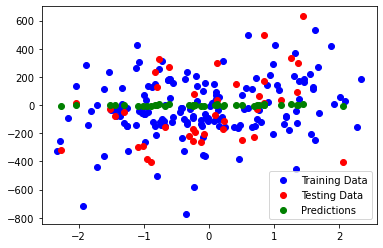

In [23]:
# Plotting our predictions with our target 
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_preds_1)

In [26]:
#Build a model 
#set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1),
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

# Fit the model
model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 160.1203 - mae: 160.1203
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 159.8406 - mae: 159.8406
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 159.5441 - mae: 159.5441
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 159.2398 - mae: 159.2398
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 158.9186 - mae: 158.9186
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 158.5724 - mae: 158.5724
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 158.1716 - mae: 158.1716
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 157.7534 - mae: 157.7534
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 157.2840 - mae: 157.2840
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 156.7336 - mae: 156.7336
Epoch 11/100
5/5 [=====================

In [27]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3538 - mae: 0.3538


[0.3538252115249634, 0.3538252115249634]

In [33]:
y_pred_2 = model_2.predict(X_test)
# y_pred_2

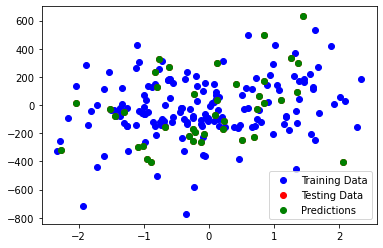

In [32]:
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_pred_2)

## 4

In [34]:
# Getting the boston datasets from tensorflow datasets 

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

65536/57026 [==================================] - 0s 0us/step


In [35]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [43]:
# Let's build a model 

tf.random.set_seed(42)

# Building a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
history = model.fit(X_train , y_train , epochs  = 300 )

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 95.6416 - mae: 95.6416
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 15.5989 - mae: 15.5989
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 8.6769 - mae: 8.6769
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 7.5622 - mae: 7.5622
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 7.1922 - mae: 7.1922
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 6.3219 - mae: 6.3219
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 6.7137 - mae: 6.7137
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 6.3261 - mae: 6.3261
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 7.6760 - mae: 7.6760
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 8.2790 - mae: 8.2790
Epoch 11/300
13/13 [==============================] - 0

In [44]:
model.evaluate(X_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [47]:
import pandas as pd

Text(0.5, 0, 'epochs')

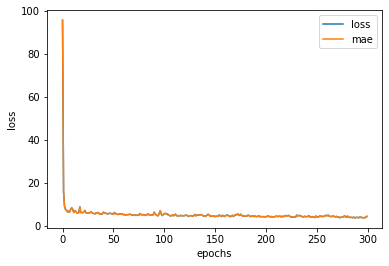

In [49]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')